# JEDHA_Certification bloc 2 
   Projet Tinder

Objectif: Mettre en évidence quelles sont les caractéristiques prédominantes dans la recherche d'un partenaire et si d'autres paramètres peuvent entrer en compte.

# 1-Importer les bibliothèque servant à nettoyer et visualiser les datas

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
from math import pi
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning )
warnings.filterwarnings("ignore", category=FutureWarning )
warnings.filterwarnings("ignore", category=UserWarning )
warnings.filterwarnings("ignore", message="Pandas requires version '1.3.6' or newer of 'bottleneck'")
warnings.simplefilter(action='ignore', category=FutureWarning)


  ### Vue d'ensemble du dataframe

In [2]:
df = pd.read_csv("Speed+Dating+Data .csv", encoding='latin1')
print(f"le Dataframe contient  {df.shape[0]} lignes et {df.shape[1]} colonnes \n")

le Dataframe contient  8378 lignes et 195 colonnes 



In [3]:
df.describe(include="all")

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


In [4]:
# Affiche la somme des valeurs nulles dans le DataFrame
print('Somme des valeurs nulles : ', df.isnull().sum().sum(), '\n')

# Affiche la somme des valeurs dupliquées dans le DataFrame
print('Somme des valeurs dupliquées : ', df.duplicated().sum())

# Description des statistiques principales du tableau de données
print(df.describe(include="all"))

Somme des valeurs nulles :  432016 

Somme des valeurs dupliquées :  0
                iid           id       gender          idg       condtn  \
count   8378.000000  8377.000000  8378.000000  8378.000000  8378.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     283.675937     8.960248     0.500597    17.327166     1.828837   
std      158.583367     5.491329     0.500029    10.940735     0.376673   
min        1.000000     1.000000     0.000000     1.000000     1.000000   
25%      154.000000     4.000000     0.000000     8.000000     2.000000   
50%      281.000000     8.000000     1.000000    16.000000     2.000000   
75%      407.000000    13.000000     1.000000    26.000000     2.000000   
max      552.000000    22.000000     1.000000    44.000000     2.000000   

               wave        r

In [5]:
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 8378

Display of dataset: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN



Basics statistics: 


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000



Percentage of missing values: 


iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
amb5_3      75.936978
Length: 195, dtype: float64

## Comment est repartie la population ?

In [6]:
df_all = df['iid'].unique()
print("nous avons une population totale de ",(len(df_all)),"candidat")
df_females = df[(df['gender'] == 0)]['iid'].unique()
print("la part de femme est de ",len(df_females))
df_males = df[(df['gender'] == 1)]['iid'].unique()
print("la part d'homme est de ",len(df_males))

nous avons une population totale de  551 candidat
la part de femme est de  274
la part d'homme est de  277


# 3- Data cleanning

In [7]:
pct_val_nul = round((df.isnull().sum()/len(df)*100),2).sort_values(ascending=False)
pct_val_nul

num_in_3    92.03
numdat_3    82.14
expnum      78.52
sinc7_2     76.67
amb7_2      76.67
            ...  
wave         0.00
condtn       0.00
idg          0.00
gender       0.00
dec          0.00
Length: 195, dtype: float64

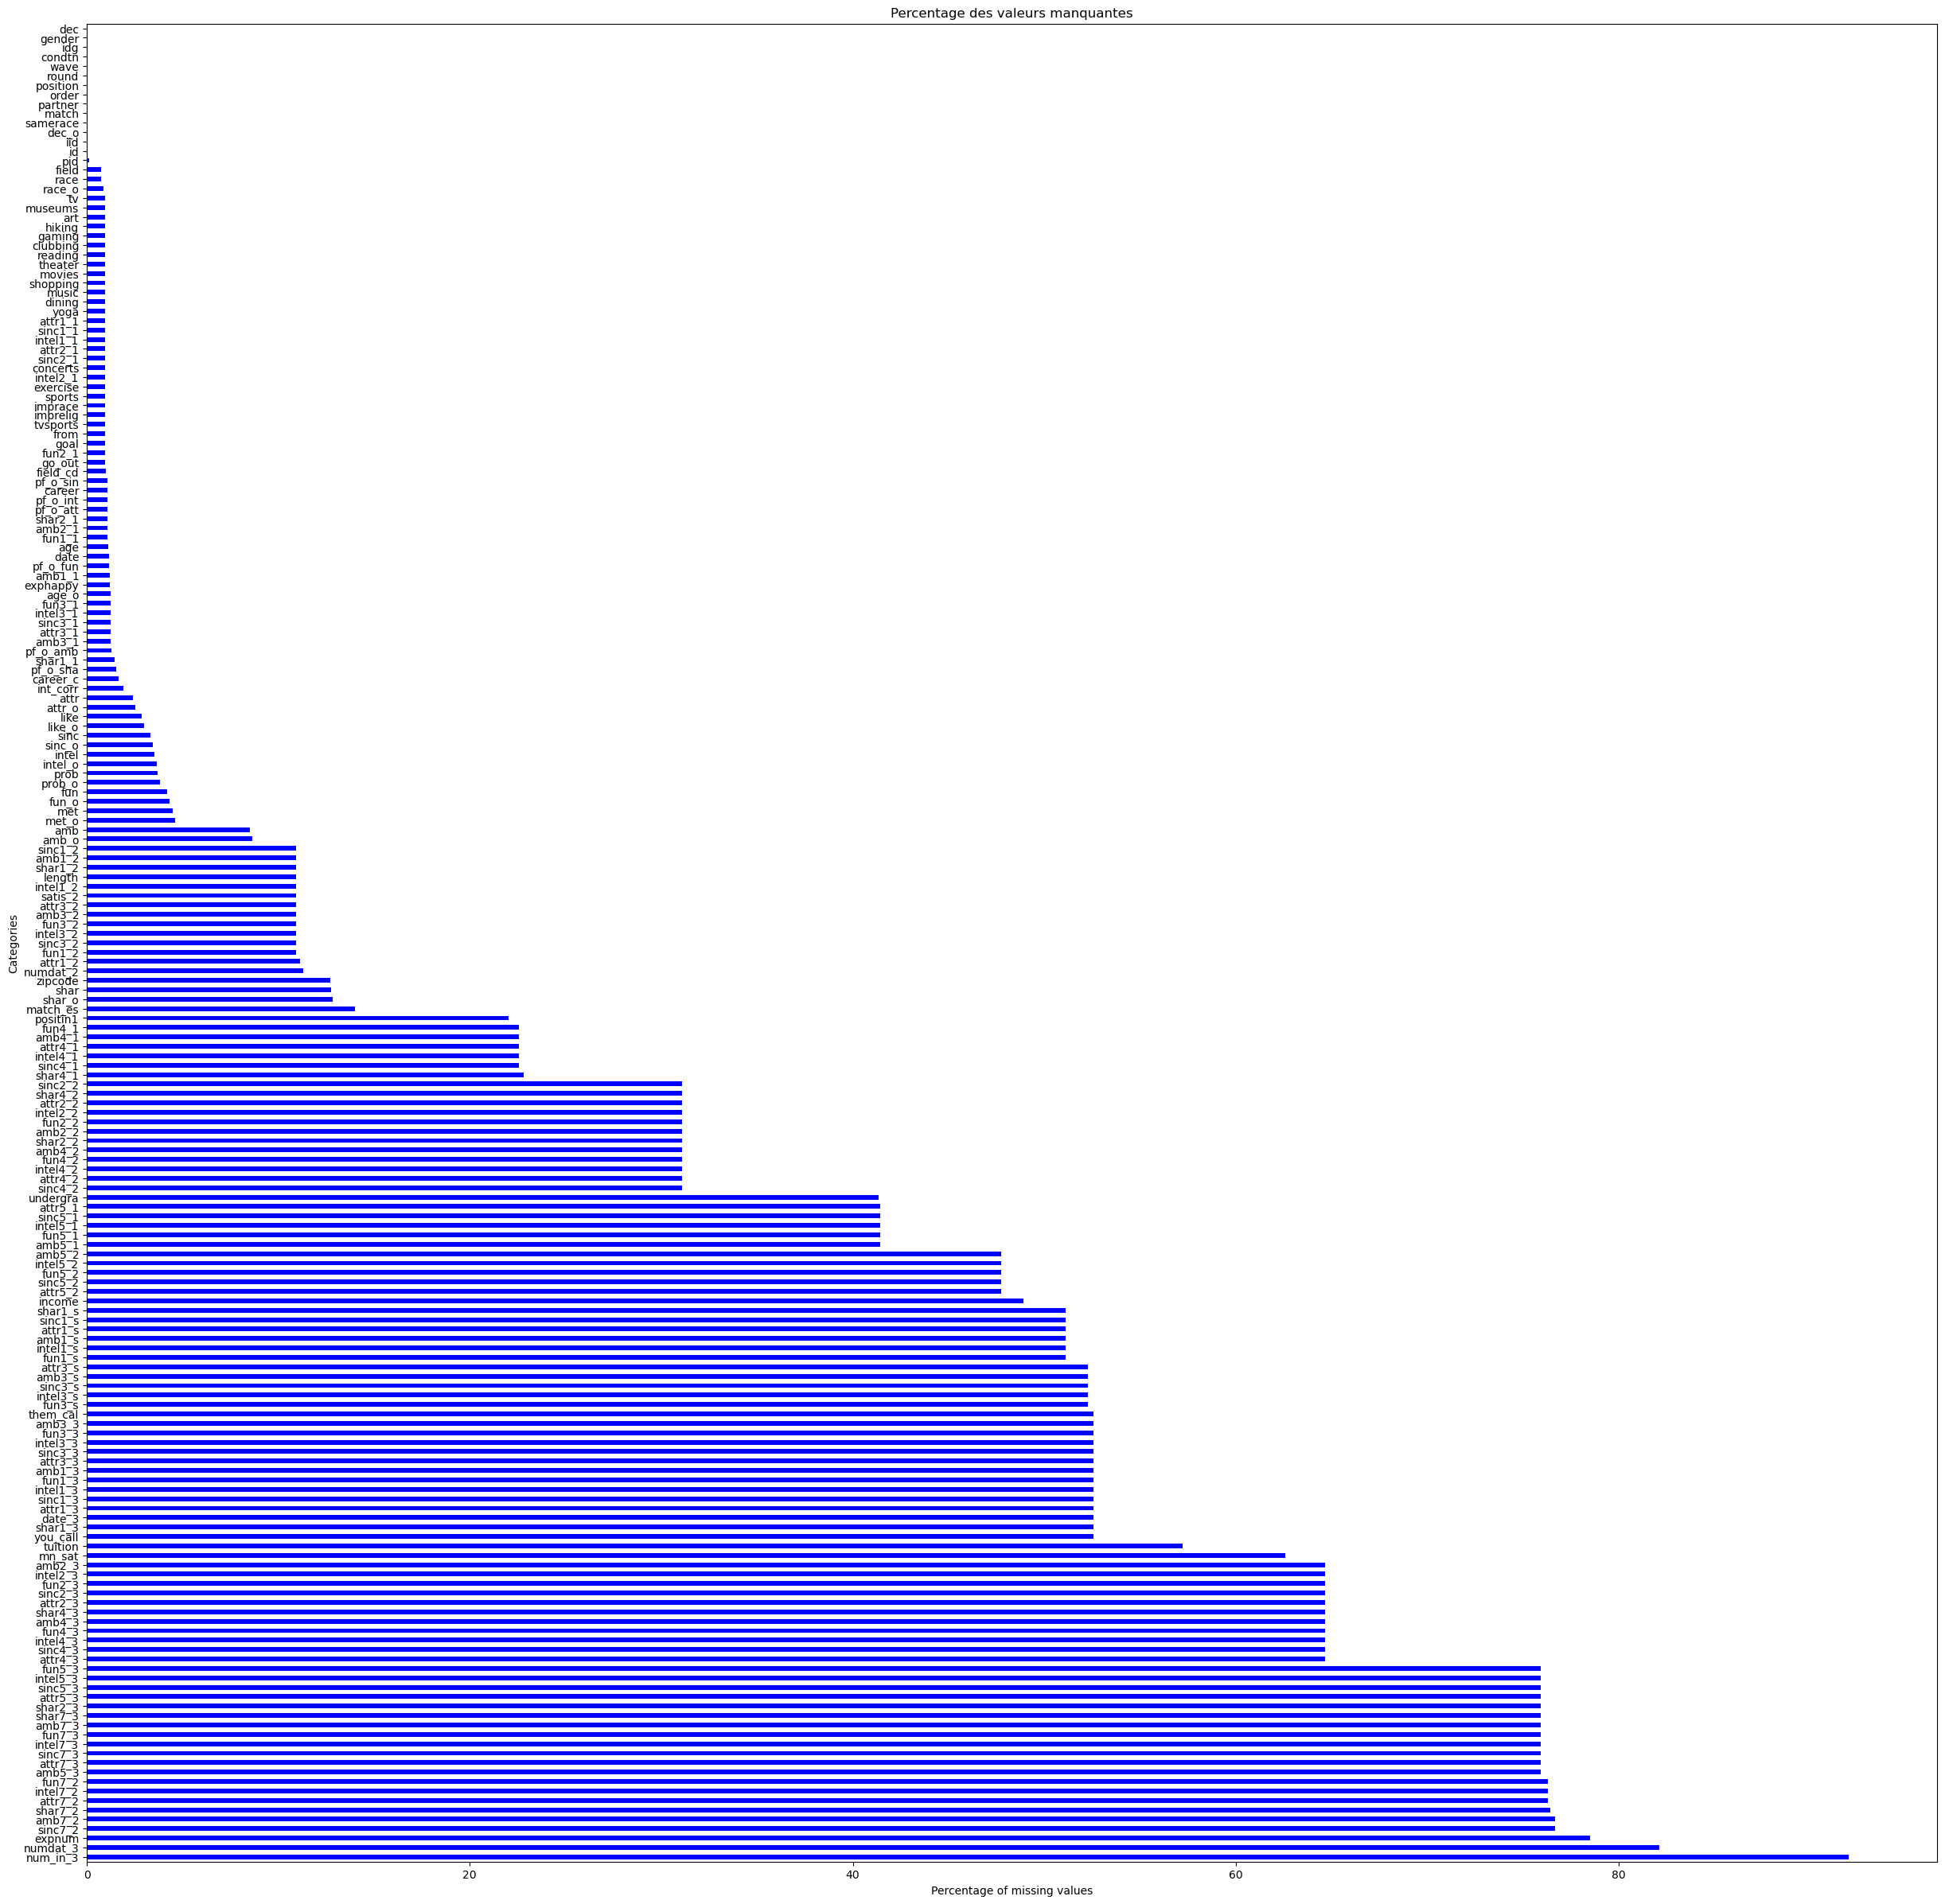

In [8]:
# faire un plot des valeurs manquantes
pct_val_nul.plot(
    figsize=(30, 30),
     kind='barh',
    color='blue',
    ylabel="Categories",
    xlabel="Percentage of missing values")
plt.title("Percentage des valeurs manquantes")
plt.show()

### on a enormement de valeurs manquantes dans le dataset

In [9]:
# Remplacement des valeurs 0 et 1 dans la colonne 'gender' par female et male
df['gender'].replace({0: 'Female',
                       1: 'Male'},
                         inplace=True)
df['gender'].isnull().sum()

0

In [10]:
# creation d'un mask car la notation n'est pas la même entre les waves 5 et 10 

waves = (df['wave'] < 6) | (df['wave'] > 9)
df_waves = df[waves]
female = df_waves['gender']=='Female'
male = df_waves['gender']=='Male'

Etude 1 : repartion des sexes ainsi que l'age en fonction des hommes et femmes 

In [11]:
print("Nombre de lignes avant suppression Nan : ", df.shape[0])
mask = df["age"] > 0
df = df[mask]
print("Nombre de lignes après suppression Nan : ", df.shape[0])
mask = df["age"] < 35
df = df[mask]
print("Nombre de lignes après suppression + 35 ans : ", df.shape[0])

Nombre de lignes avant suppression Nan :  8378
Nombre de lignes après suppression Nan :  8283
Nombre de lignes après suppression + 35 ans :  8110


In [12]:
print("L'âge moyen de la population est de", round(df["age"].mean()),"ans","nous sommes donc sur une moyennes d'ages assez jeune")


L'âge moyen de la population est de 26 ans nous sommes donc sur une moyennes d'ages assez jeune


## comment sont reparties les ages en fonction du genre ?

In [13]:
color_mapping = {'Male': 'blue', 'Female': 'red'}
fig=px.box(df,x="age", color='gender', color_discrete_map=color_mapping)
df_filtre = df[df['age'] < 35] 
fig.show()

In [14]:
# representation du genre 'Male' et 'Female'
color_mapping = {'Male': 'blue', 'Female': 'red'}
fig = px.histogram(df, x='gender', text_auto=True, color='gender', color_discrete_map=color_mapping)
fig.update_layout(width=700, height=400)
fig.show()

In [15]:

# Créer une figure avec une disposition de sous-tracés 
fig = make_subplots(rows=1, cols=3, subplot_titles=("Répartition de l'âge (Hommes)", "Répartition de l'âge (Femmes)", "Répartition des genres"))

# Filtrer les données pour les hommes et les femmes
df_male = df[df['gender'] == 'Male']
df_female = df[df['gender'] == 'Female']

# Ajouter un diagramme en boîte pour l'âge des hommes
fig.add_trace(
    go.Box(
        x=df_male['age'],
        marker_color='blue',  # Couleur bleue pour les hommes
        boxmean=True,
        name='Male'  # Légende pour les hommes
    ),
    row=1, col=1
)

# Ajouter un diagramme en boîte pour l'âge des femmes
fig.add_trace(
    go.Box(
        x=df_female['age'],
        marker_color='red',  # Couleur rouge pour les femmes
        boxmean=True,
        name='Female'  # Légende pour les femmes
    ),
    row=1, col=2
)

# Ajouter un histogramme pour la répartition des genres
fig.add_trace(
    go.Histogram(
        x=df['gender'],
        marker_color=['blue', 'red'],  # Couleurs pour les hommes et les femmes
        opacity=0.7,  # Opacité des barres
        name='Gender'  # Légende pour la répartition des genres
    ),
    row=1, col=3
)

# Mettre en place la mise en page
fig.update_layout(
    title="Répartition de l'âge par genre et répartition des genres",
    showlegend=False,
    height=400,
    width=1000
)

fig.show()


repartion des genres en fonction du genre ( male ou female): on vois que la proportion est casi la meme et la moyenne d'age aussi 

In [16]:
# compilation  des valeurs  dans la colonne race
race_c=[1, 2, 3, 4, 5, 6]
Ethnie= ['Black/African American', 'European/Caucasian-American', 'Latino/Hispanic American', 'Asian/Pacific/Islander/Asian-American', 'Native American', 'Autre']
for i,k in zip(race_c,Ethnie):
    df['race'].replace (i, k , inplace=True)

In [17]:
fig = px.histogram(df, x = 'race', color= 'gender', text_auto =True
                   ).update_xaxes (categoryorder= 'total ascending')
fig.show()

## repartition en fonction du statut social 

In [18]:
#remplacement des valeurs 1 à 17 dans la colonne career
career_code = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
career = ['Lawyer', 'Academic/research', 'Psychologist', 'Doctor/Medecine', 'Engineer',
          'Creative Arts/Entertainment', 'Banking/Consulting/Finance/Marketing/Business/CEO/Entrepeneur/Admin',
          'Real Estate', 'International/Humanitarian Affairs', 'Undecided', 'Social Work', 'Speech Pathology',
          'Politics', 'Pro sports/Athletics', 'Others', 'Journalism', 'Architecture']
for i, j in zip(career_code, career):
    df['career_c'].replace([i],
                             j,
                             inplace=True)

In [19]:
fig = px.histogram(df, x = 'career_c', color= 'gender', text_auto =True
                   ).update_xaxes(categoryorder= 'total ascending')
fig.show()

Avant de commencer notre etude nous allons nous posez la bonne question et savoir qu'elle est reelement la "target" de ce dataset !
le "match" est la target !

In [20]:
df['match']=df['match'].replace({0:"No",1:"Yes"})
print(df['match'].value_counts())

pourecentage_match=df['match'].value_counts(normalize=True) * 100
print(pourecentage_match.apply(lambda x: 
                               f"{x:.2f}%"))

match
No     6770
Yes    1340
Name: count, dtype: int64
match
No     83.48%
Yes    16.52%
Name: proportion, dtype: object


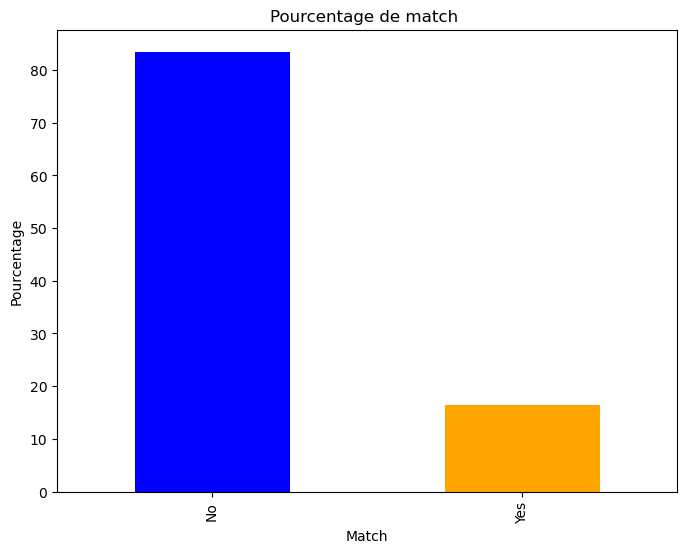

In [21]:
plt.figure(figsize=(8, 6))
pourecentage_match.plot(kind='bar', color=['blue', 'orange'])
plt.title('Pourcentage de match ')
plt.xlabel('Match')
plt.ylabel('Pourcentage')
plt.show()

On note donc que après un speed dating on a uniquement 16.52 % de chance de refaire un deuxeime rendez-vous !

#### quel est le but des participants de ce speed_dating ?

In [22]:
df_goal = df.groupby(['goal']).count().reset_index()
# remplacement des valeurs 
dict = {
    1: "Seemed like a fun night out",
    2: "To meet new people",
    3: "To get a date",
    4: "Looking for a serious relationship",
    5: "To say I did it",
    6: "Other"
}

df_goal['goal'] = df_goal['goal'].replace(dict)

fig = px.pie(df_goal, names = df_goal['goal'],values = df_goal['id'])
fig.show()

### on peut observer que une grosse partie des participants cherchent une relation ephémère (42%) et on a aussi une grosse part de cette population qui cherche à rencontrer de nouvelles personnes (35.9%)

## A.    Quels sont les attributs les moins désirables chez un partenaire masculin ? Est-ce différent pour les partenaires féminines ?

In [23]:
#Création d'un dataset pour chaque genre.

dfb_gender = df.groupby('gender')[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].mean()

dfb_gender.reset_index(inplace=True)

dfb_gender

,gender,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,Female,18.122895,18.296364,20.990619,17.159229,12.844691,12.628600
1,Male,26.894216,16.449871,19.550610,17.720973,8.576473,11.035852


In [24]:
genre_datah = dfb_gender.loc[dfb_gender["gender"] == "Male"].values.flatten().tolist()
genre_datah

['Male',
 26.894216044867107,
 16.449870763228482,
 19.550609607412827,
 17.720972867269616,
 8.57647274505011,
 11.035851869958446]

In [25]:
genre_dataf = dfb_gender.loc[dfb_gender["gender"] == "Female"].values.flatten().tolist()
genre_dataf

['Female',
 18.12289506636614,
 18.296363636363637,
 20.990618582519406,
 17.15922865013774,
 12.844690708740295,
 12.628599848904557]

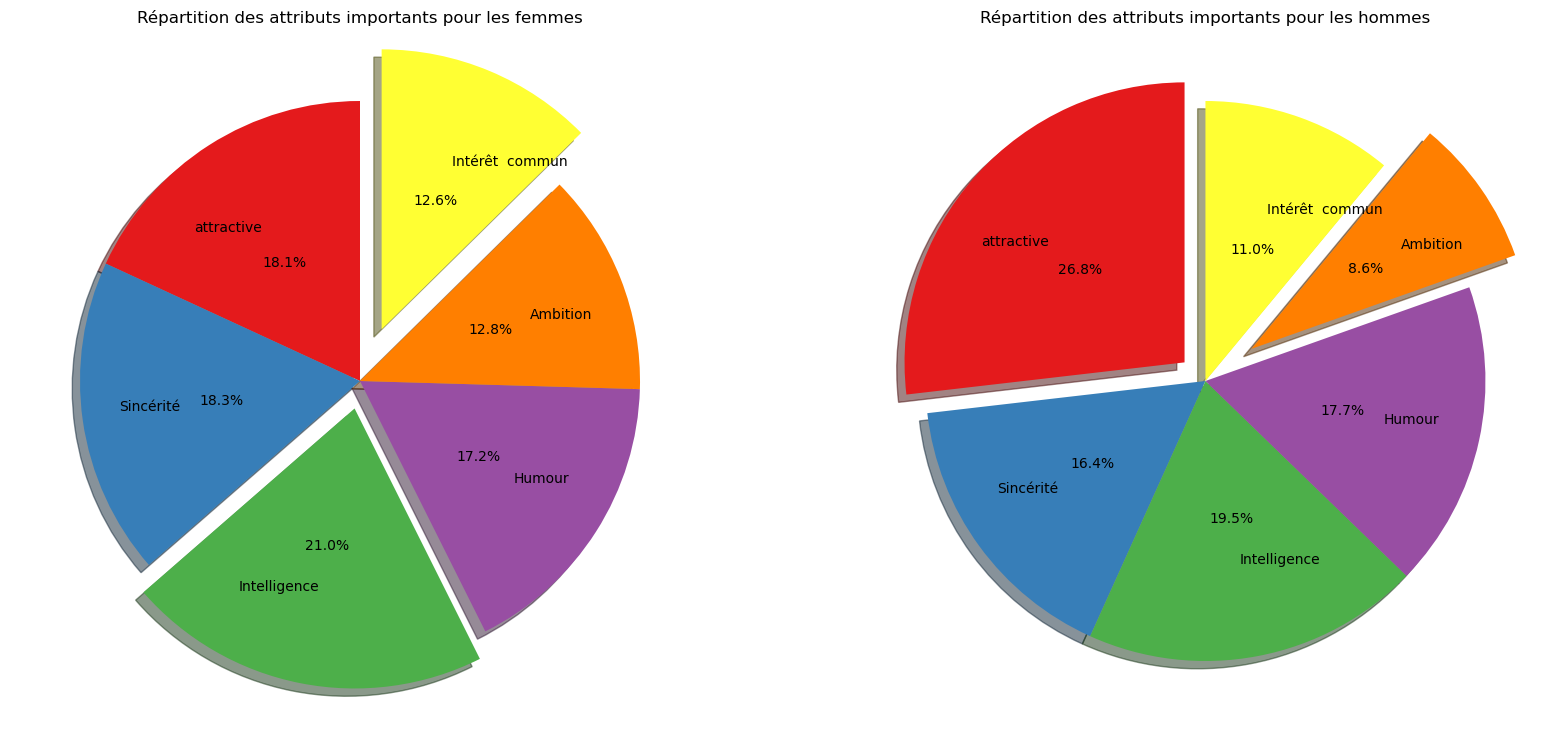

In [26]:
labels = 'attractive', 'Sincérité', 'Intelligence', 'Humour', 'Ambition', 'Intérêt  commun'

#valeurs pour pie chart pour les hommes

genre_datah = dfb_gender.loc[dfb_gender["gender"] == "Male"].values.flatten().tolist()
genre_datah = [value for value in genre_datah if value != "Male"]
explodeh = (0.1, 0, 0, 0, 0.2, 0)

#Valeurs pour pie chart pour les femmes
genre_dataf = dfb_gender.loc[dfb_gender["gender"] == "Female"].values.flatten().tolist()
genre_dataf = [value for value in genre_dataf if value != "Female"]
explodef = (0, 0, 0.1 , 0, 0, 0.2)


#Création de 2 pie charts
plt.figure(figsize=(20, 20))

#Pie Chart homme
plt.subplot(222)
plt.pie(genre_datah, explode = explodeh, labels= labels,
        colors= sns.color_palette('Set1'),
        labeldistance=0.65,
        pctdistance=0.5,
        autopct= '%1.1f%%', shadow= True, startangle= 90)

#titre
plt.title("Répartition des attributs importants pour les hommes")


#Pie Chart femme

plt.subplot(221)
plt.pie(genre_dataf , explode = explodef, labels= labels,
        colors= sns.color_palette('Set1'),
        labeldistance=0.65,
        pctdistance=0.5,
        autopct= '%1.1f%%', shadow= True, startangle= 90)

#titre
plt.title("Répartition des attributs importants pour les femmes")
plt.show()



pour les femmes les points sont reparties de manières assez similaires mais avec un leger penchant pour l'intelligence.
pour les hommes le critères principal est "l'atractivité" donc lapparence physique .

# Ces resulats sont-ils concordant après un premier date ?

# B-Dans quelle mesure les gens pensent-ils que l’attrait est important dans la sélection des partenaires potentiels par rapport à son impact réel?

In [27]:
df_attr_date = df.groupby('gender')[['attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2']].mean()

df_attr_date.reset_index(inplace=True)

df_attr_date

,gender,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2
0,Female,28.492492,15.475510,15.796797,18.722723,8.140816,14.056056
1,Male,37.486856,11.695005,14.954784,19.243954,6.363443,10.365569


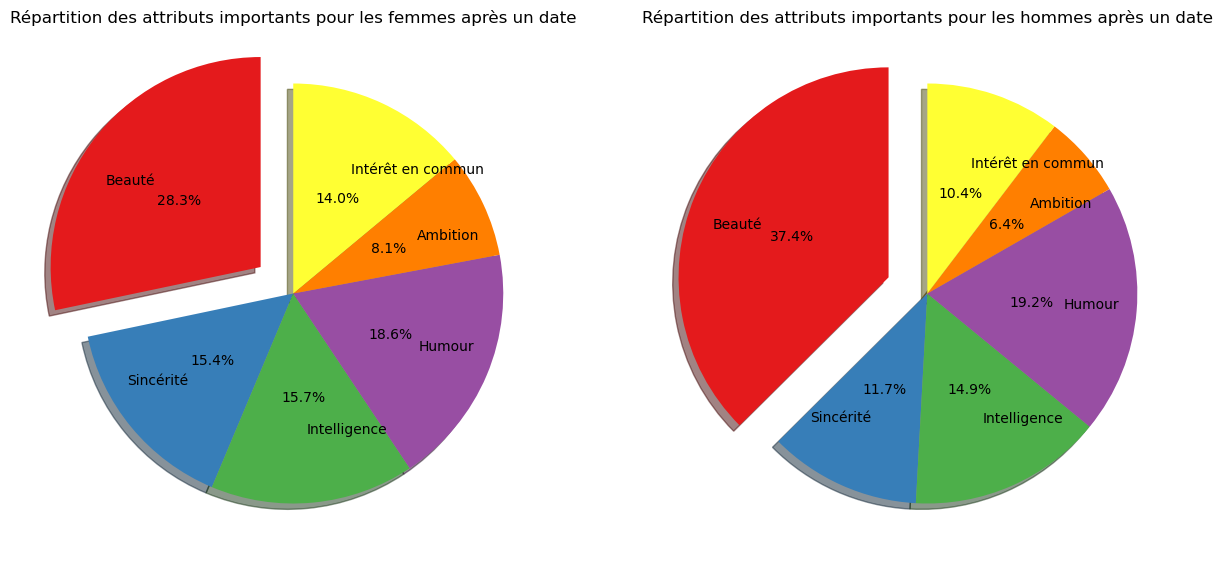

In [28]:
#Paramètres pour la création de Pie charts
labels = 'Beauté', 'Sincérité', 'Intelligence', 'Humour', 'Ambition', 'Intérêt en commun'

#Valeurs pour pie chart pour les femmes
genre_dataf = df_attr_date.loc[df_attr_date["gender"] == "Female"].values.flatten().tolist()
genre_dataf = [value for value in genre_dataf if value != "Female"]
explodef = (0.2, 0, 0 , 0, 0, 0)

#valeurs pour pie chart pour les hommes
genre_datah = df_attr_date.loc[df_attr_date["gender"] == "Male"].values.flatten().tolist()
genre_datah = [value for value in genre_datah if value != "Male"]
explodeh = (0.2, 0, 0, 0, 0, 0)

#Création de 2 pie charts
plt.figure(figsize=(15, 15))
#Pie Chart femme
plt.subplot(221)
plt.pie(genre_dataf , explode = explodef, labels= labels,
        colors= sns.color_palette('Set1'),
        labeldistance=0.65,
        pctdistance=0.5,
        autopct= '%1.1f%%', shadow= True, startangle= 90)

#titre
plt.title("Répartition des attributs importants pour les femmes après un date")

#Pie Chart homme
plt.subplot(222)
plt.pie(genre_datah, explode = explodeh, labels= labels,
        colors= sns.color_palette('Set1'),
        labeldistance=0.65,
        pctdistance=0.5,
        autopct= '%1.1f%%', shadow= True, startangle= 90)

#titre
plt.title("Répartition des attributs importants pour les hommes après un date")

plt.show()

In [29]:
note_female_before = df_waves[female]['attr1_1'].mean().round(2)
note_female_after = df_waves[female]['attr7_2'].mean().round(2)
delta_female = round((note_female_after - note_female_before)/note_female_before*100,2)
print(delta_female,"%")

52.37 %


In [30]:
note_male_before = df_waves[male]['attr1_1'].mean().round(2)
note_male_after = df_waves[male]['attr7_2'].mean().round(2)
delta_male = round((note_male_after - note_male_before)/note_male_before*100,2)
print(delta_male,"%")

28.17 %


In [37]:
results = pd.DataFrame({'Men': [note_male_before,note_male_after],
                        'Women': [note_female_before,note_female_after]
                        },
                        index=['AVG rating before','AVG rating after'])

results.T

,AVG rating before,AVG rating after
Men,29.11,37.31
Women,18.79,28.63


## C-quel est l'importance de  l'origine raciale  ?

In [32]:
# Remplacement des valeurs 0 et 1 dans la colonne 'samerace' par yes et no
df['samerace'].replace({0: 'yes',
                         1: 'no'},
                           inplace=True)
df['samerace'].isnull().sum()

0

In [33]:
df['imprace']
round(df['imprace'].value_counts(normalize=True)*100,1)

imprace
1.0     33.0
3.0     12.1
2.0     11.8
8.0      8.2
5.0      7.6
7.0      6.7
6.0      6.2
4.0      6.1
9.0      5.1
10.0     3.1
0.0      0.1
Name: proportion, dtype: float64

L’importance d’une même origine ethnique n’est pas un critère de sélection principale

In [34]:
pd.DataFrame(df['samerace'],df['match'])
round(df.groupby('samerace')['match'].value_counts(normalize=True)*100,2)


samerace  match
no        No       82.75
          Yes      17.25
yes       No       83.96
          Yes      16.04
Name: proportion, dtype: float64

# D-Pour ce qui est d'obtenir un deuxième rendez-vous, est-il préférable d'être le premier speed date de la soirée ou le dernier ?

In [36]:
df['First_or_last'] = df.apply(lambda x: 'first' 
                               if x['order']==1 
                               else 'last' if x['order']==x['round']
                                else 'middle', axis=1)

#pourcentage des valeurs pour les premiers passages et les derniers 

percentage_match = df.groupby(by='First_or_last')['dec'].mean().loc[['first', 'last']]

#Plotting the result
fig = px.bar(percentage_match, text_auto='.1%', title='pourcentage des matchs pour les premiers et derniers passages',
             labels={'First_or_last':'Ordre des  dates', "value":"Percentage"},
             orientation='v',
             color=percentage_match.index)
fig.update_layout()
fig.show()

l'orde de passage ne joue donc pas enormément sur le fait qu'il ya match ou non

# Conclusion

#### La recherche d'un partenaire est un processus complexe influencé par une combinaison de facteurs physiques, émotionnels, sociaux et personnels. Bien que certaines caractéristiques soient souvent prédominantes, d'autres paramètres jouent également un rôle crucial et peuvent varier en importance selon les individus. c'est pourquoi nous nous sommes focalisé sur certains facteurs qui nous ont aidés a pouvoir repondre à la problématique initiale .

Les points importants pour  faire un MATCH :

* Votre âge doit être assez jeune (moyenne d'age 26 ans )
* l'origine raciale n'est pas forcément un facteur important pour avoir un deuxième match.
* mais l'ordre de passage lors du speed-dating n'influe pas enormément !